# Question 1 Report: Air Quality Prediction and Model Comparison

# 1- Installing the necessary libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Visualization settings
plt.style.use('ggplot')
%matplotlib inline

## 2) Loading the data set

In [11]:
file_path = "updated_pollution_dataset.csv"
pollution_data = pd.read_csv(file_path)

## 3) Viewing the first 5 lines

In [14]:
print("The First 5 Lines of the Data Set:")
display(pollution_data.head())

The First 5 Lines of the Data Set:


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


## 3) General information about the data set

In [17]:
print("\nData Set General Information:")
display(pollution_data.info())


Data Set General Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


None

## 4) Checking for missing values in the data set

In [20]:
print("\nThe Number of Missing Values:")
missing_values = pollution_data.isnull().sum()
display(missing_values)


The Number of Missing Values:


Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

## 5) Statistical summary

In [23]:
print("\nStatistical Summary of the Data Set:")
display(pollution_data.describe())


Statistical Summary of the Data Set:


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


## 6) Pairplot to see the Decoupling between properties

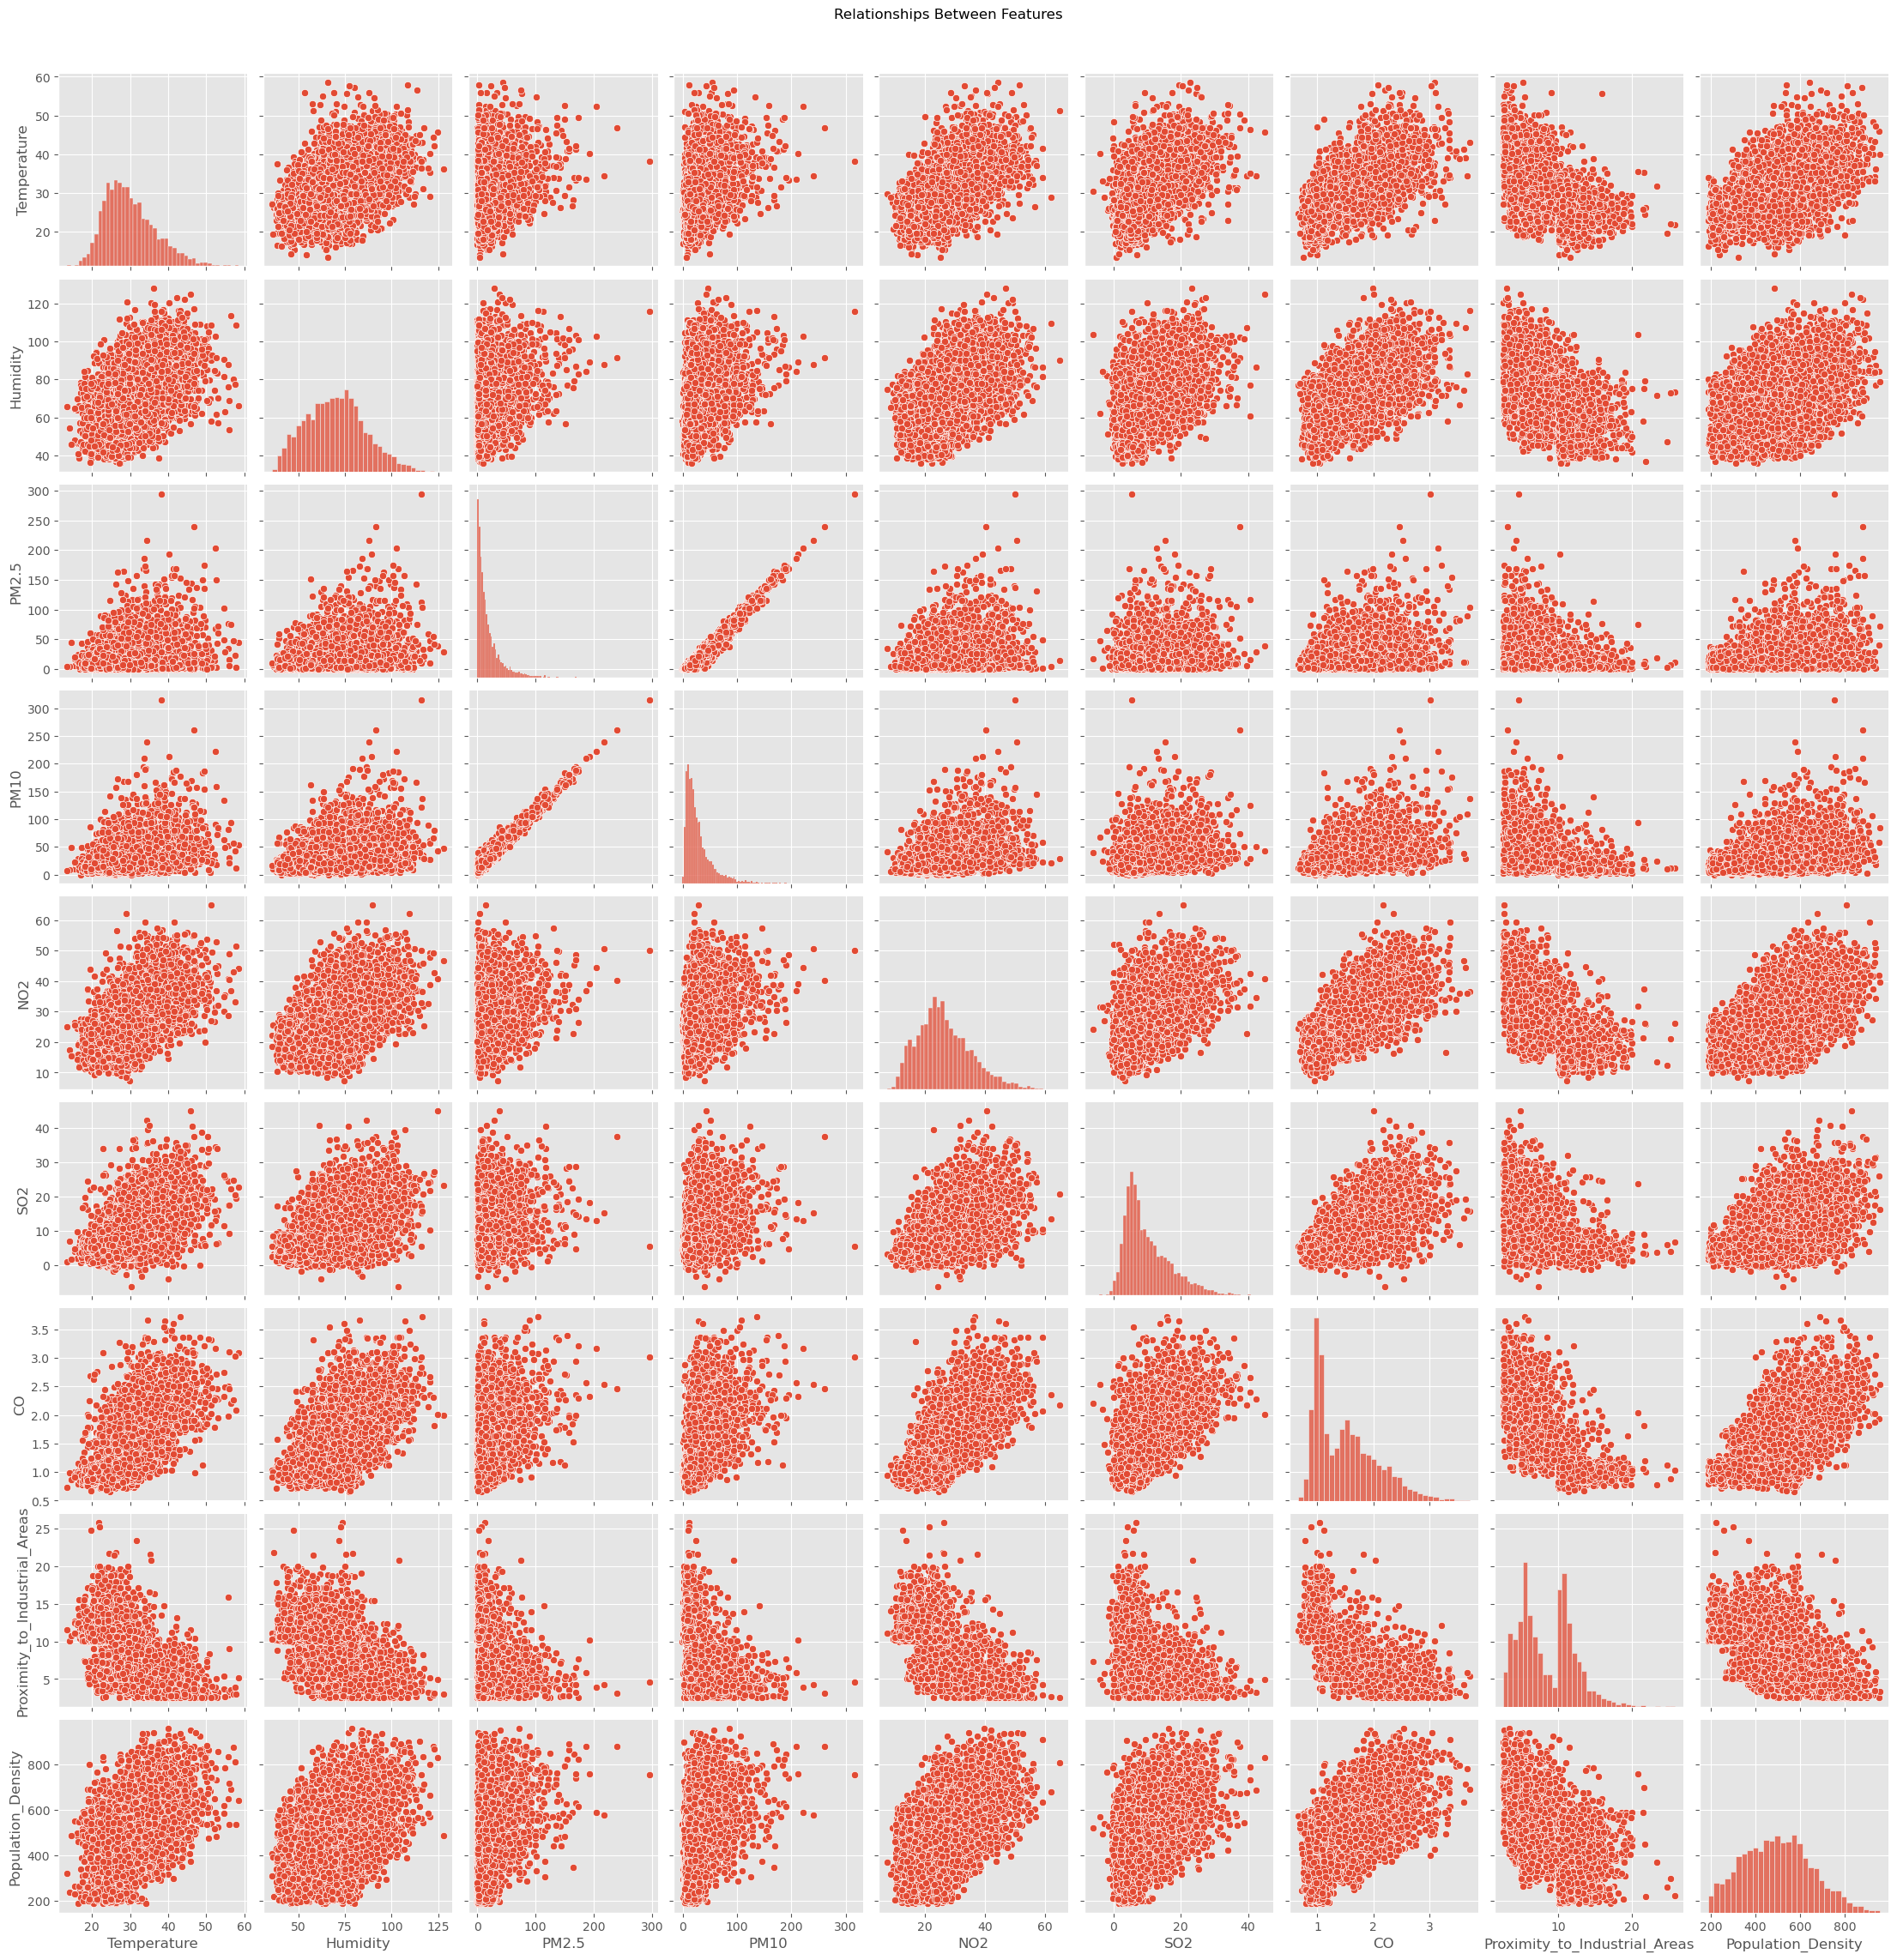

In [26]:
sns.pairplot(pollution_data)
plt.suptitle('Relationships Between Features', y=1.02)
plt.show()

## 7) Checking for missing values in the data set

In [29]:
numeric_columns = pollution_data.select_dtypes(include=[np.number])
pollution_data[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.median())

missing_values = pollution_data.isnull().sum()
print("\nMissing Values (After Filling):")
display(missing_values)


Missing Values (After Filling):


Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

## 8) Histogram graphs after filling in the missing values

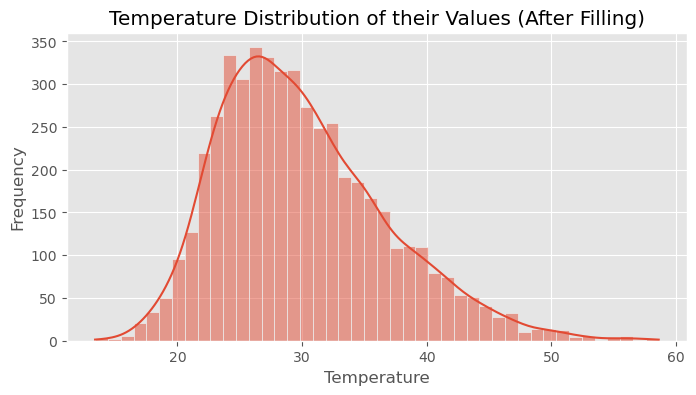

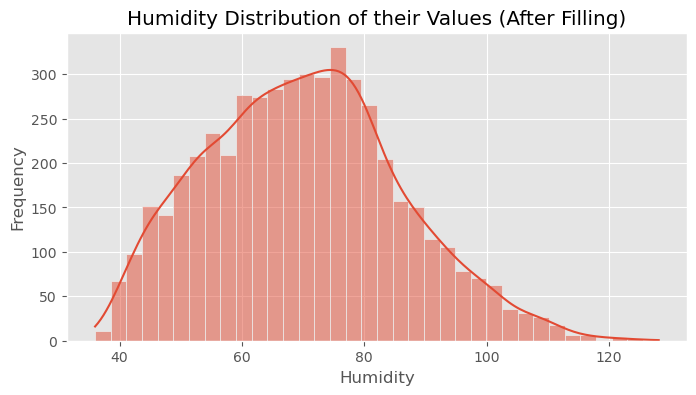

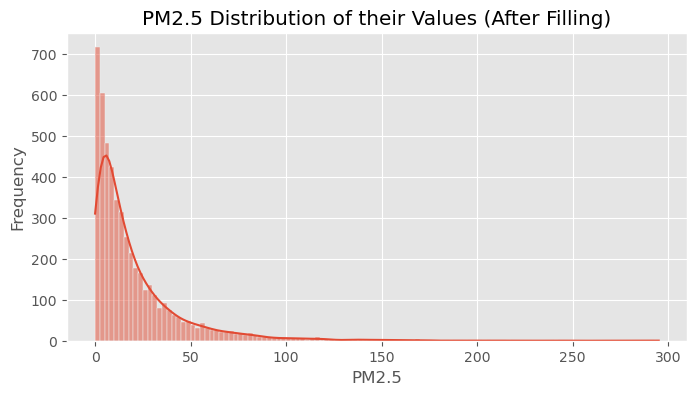

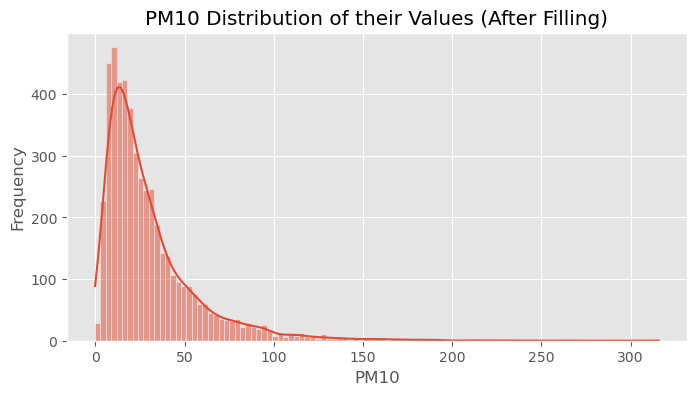

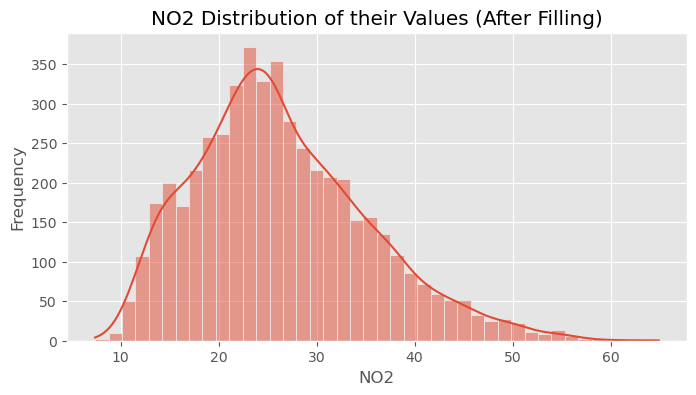

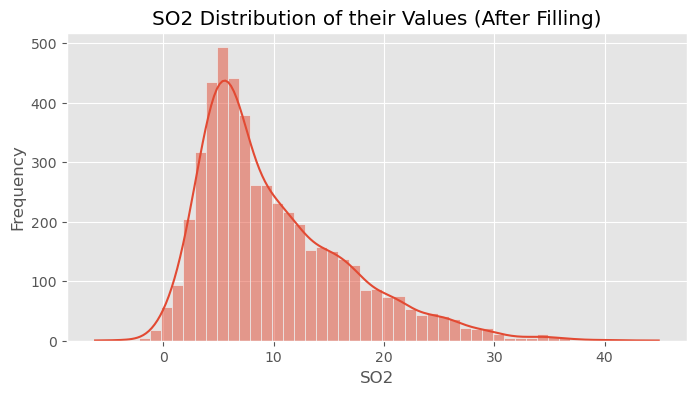

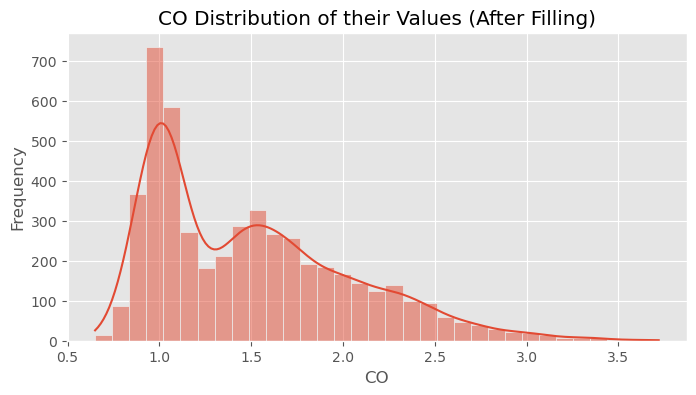

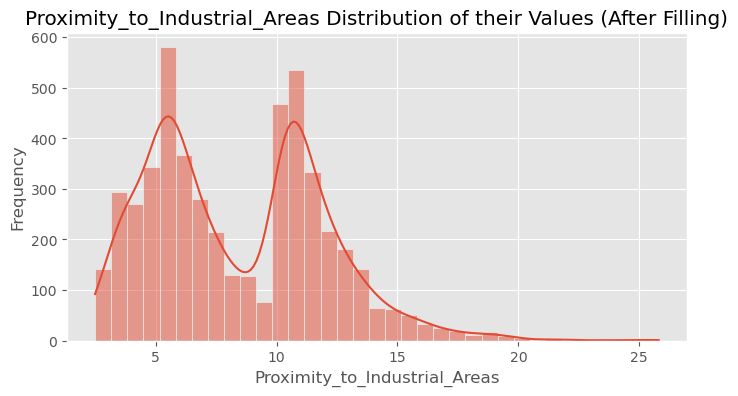

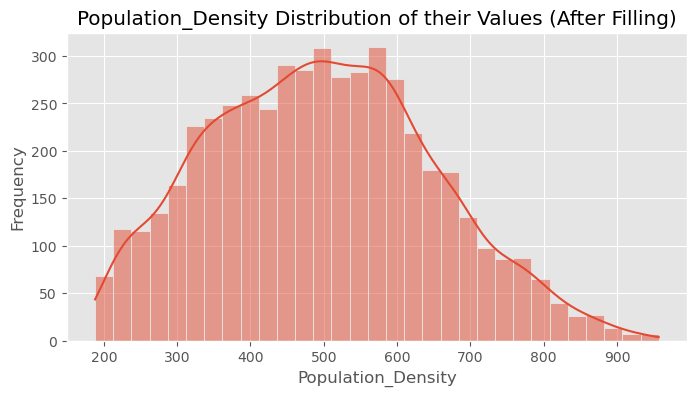

In [32]:
for column in numeric_columns.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(pollution_data[column], kde=True)
    plt.title(f'{column} Distribution of their Values (After Filling)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

## 9) Statistical summary of the data set after filling in the missing values

In [35]:
pollution_data.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


## 10) Filling in the missing values and then checking whether there are missing values in the data set

In [38]:
numeric_columns = pollution_data.select_dtypes(include=[np.number])
pollution_data[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.median())

missing_values = pollution_data.isnull().sum()
print("Missing Values (After Filling):\n", missing_values)

Missing Values (After Filling):
 Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64


## 11) Digitization of categorical variables (One-Hot Encoding)

In [41]:
pollution_data_encoded = pd.get_dummies(pollution_data, drop_first=True)

print("\nThe First 5 Lines of the Data Set (After One-Hot Encoding):")
display(pollution_data_encoded.head())


The First 5 Lines of the Data Set (After One-Hot Encoding):


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality_Hazardous,Air Quality_Moderate,Air Quality_Poor
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,False,True,False
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,False,True,False
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,False,True,False
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,False,False,False
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,False,False,False


## 12) Numerical distribution of categorical properties after encoding

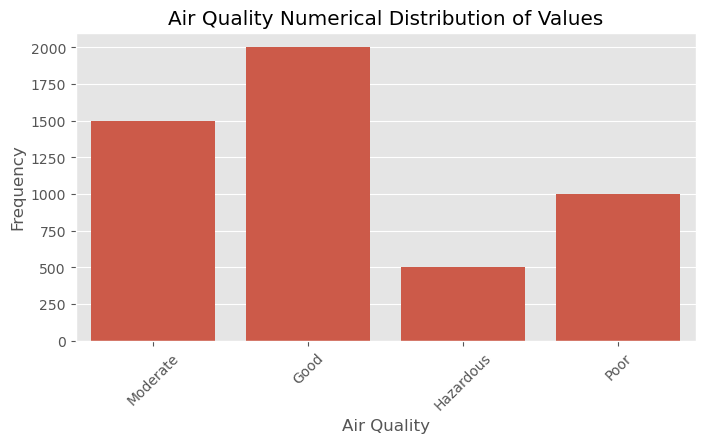

In [44]:
categorical_columns = pollution_data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=pollution_data, x=column)
    plt.title(f'{column} Numerical Distribution of Values')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

## 13) Separation of target variable and independent variables

In [47]:
X = pollution_data_encoded.drop('Air Quality_Moderate', axis=1)
y = pollution_data_encoded['Air Quality_Moderate']

print("\nThe First 5 Lines of the Arguments are:")
display(X.head())
print("\nThe First 5 Values of the Target Variable are:")
display(y.head())


The First 5 Lines of the Arguments are:


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality_Hazardous,Air Quality_Poor
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,False,False
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,False,False
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,False,False
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,False,False
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,False,False



The First 5 Values of the Target Variable are:


0     True
1     True
2     True
3    False
4    False
Name: Air Quality_Moderate, dtype: bool

## 14) Visualizing the distributions of independent and target variables

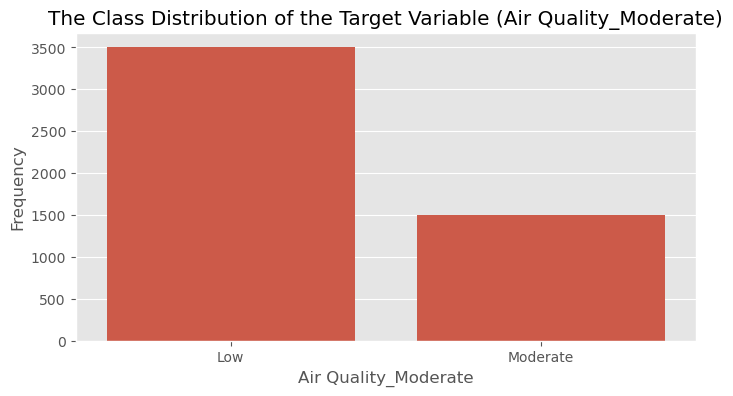

In [50]:
plt.figure(figsize=(8, 4))
sns.countplot(x=y)
plt.title("The Class Distribution of the Target Variable (Air Quality_Moderate)")
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Low', 'Moderate'])
plt.show()

## 15) Dividing the data into training and test sets

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (4000, 11)
Test set size: (1000, 11)


## 16) Distribution of characteristics of training and test sets

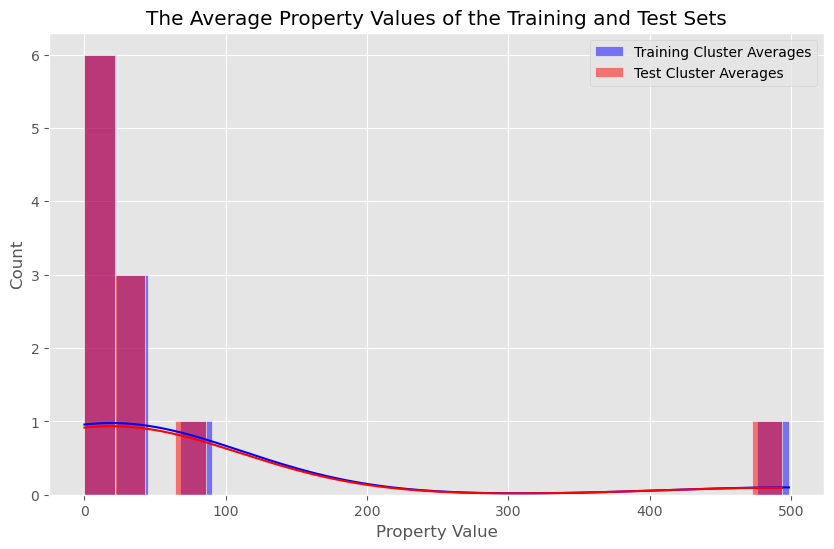

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(X_train.mean(), color='blue', label='Training Cluster Averages', kde=True)
sns.histplot(X_test.mean(), color='red', label='Test Cluster Averages', kde=True)
plt.title('The Average Property Values of the Training and Test Sets')
plt.xlabel('Property Value')
plt.legend()
plt.show()

## 17) Determining the hyperparameters of the Decision Tree model

In [59]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_tree_model = grid_search.best_estimator_
y_pred_tree = best_tree_model.predict(X_test)

print("\nThe Best Decision Tree Hyperparameters Are:", grid_search.best_params_)


The Best Decision Tree Hyperparameters Are: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


## 18) Visualizing the tree structure of the model

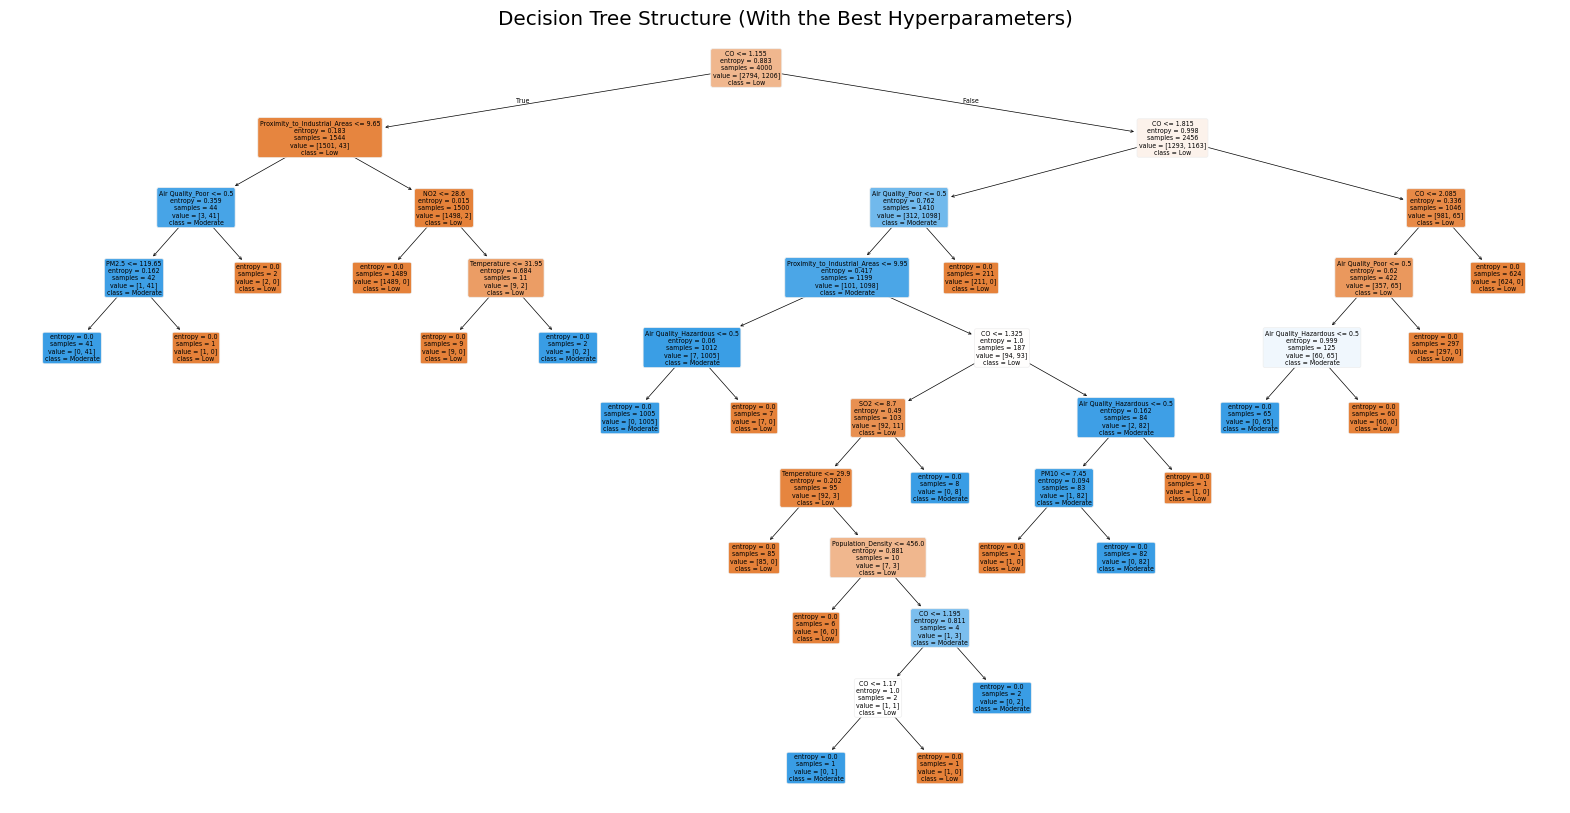

In [62]:
from sklearn import tree
plt.figure(figsize=(20, 10))
tree.plot_tree(best_tree_model, filled=True, feature_names=X.columns, class_names=['Low', 'Moderate'], rounded=True)
plt.title("Decision Tree Structure (With the Best Hyperparameters)")
plt.show()

## 19) Evaluating the performance of the model

In [65]:
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree, average='weighted')
recall_tree = recall_score(y_test, y_pred_tree, average='weighted')
f1_tree = f1_score(y_test, y_pred_tree, average='weighted')

print("\nDecision Tree Model Performance Metrics:")
print(f"Accuracy: {accuracy_tree:.2f}")
print(f"Precision: {precision_tree:.2f}")
print(f"Recall: {recall_tree:.2f}")
print(f"F1 Score: {f1_tree:.2f}")


Decision Tree Model Performance Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


## 20) The confusion matrix for the Decision Tree is

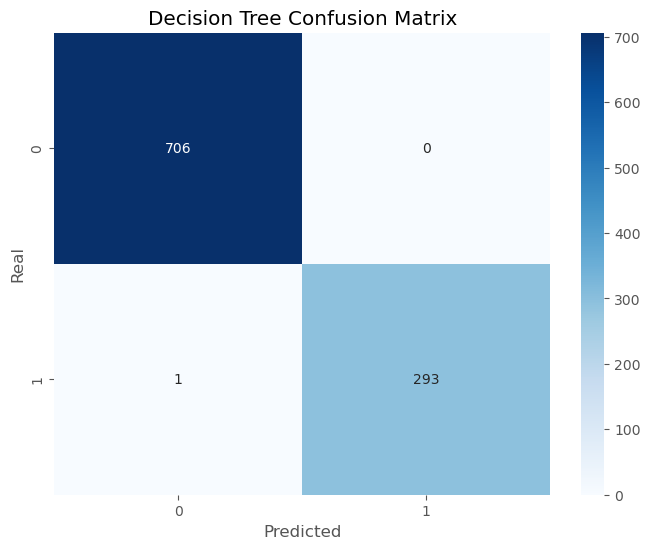

In [68]:
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tree, annot=True, cmap='Blues', fmt='g')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Real")
plt.show()

## 21) Random Forest hyperparameters

In [71]:
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

print("\nThe Best Random Forest Hyperparameters:", grid_search_rf.best_params_)


The Best Random Forest Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


## 22) Evaluating the performance of the Random Forest model

In [74]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("\nRandom Forest Model Performance Metrics:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}")


Random Forest Model Performance Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


## 23) Confusion matrix for Random Forest

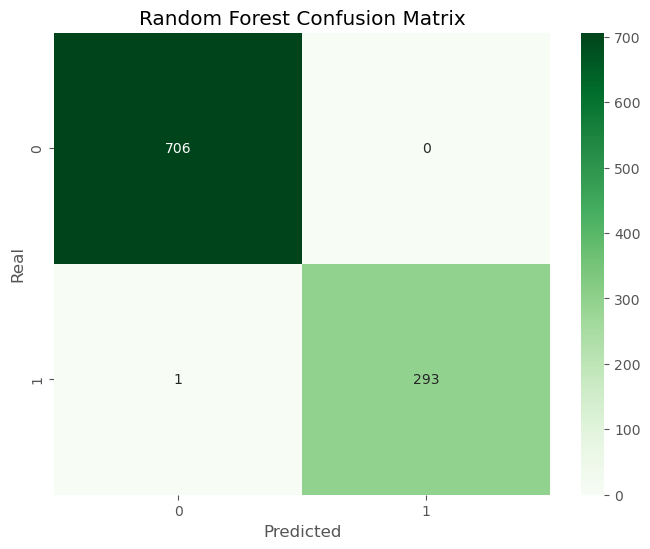

In [77]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, cmap='Greens', fmt='g')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Real")
plt.show()

## 24) Comparing the performance of models

In [80]:
model_comparison = {
    'Model': ['Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_tree, accuracy_rf],
    'Precision': [precision_tree, precision_rf],
    'Recall': [recall_tree, recall_rf],
    'F1 Score': [f1_tree, f1_rf]
}

comparison_df = pd.DataFrame(model_comparison)
print("Model Performance Comparison:")
display(comparison_df)

Model Performance Comparison:


,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.999,0.999001,0.999,0.999
1,Random Forest,0.999,0.999001,0.999,0.999


## 25) Visualization of the comparison table

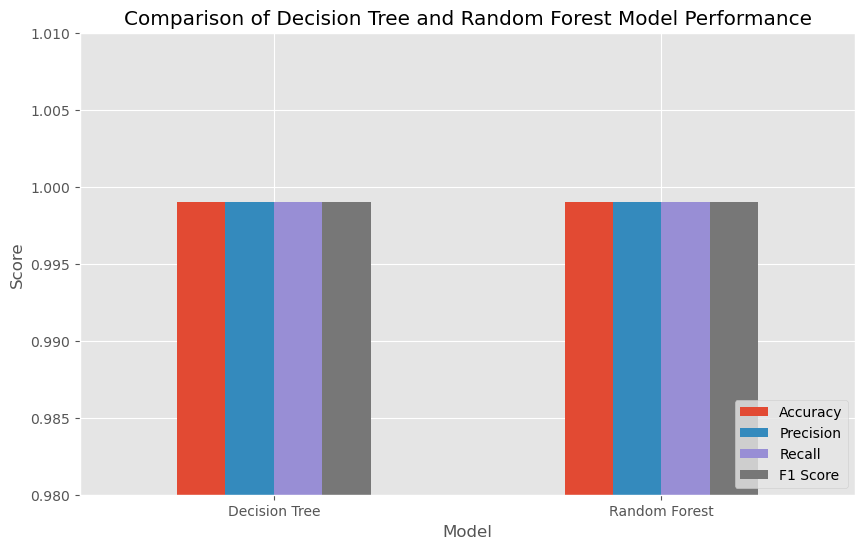

In [83]:
fig, ax = plt.subplots(figsize=(10, 6))
comparison_df.set_index('Model').plot(kind='bar', ax=ax)

plt.ylim(0.98, 1.01)

plt.title('Comparison of Decision Tree and Random Forest Model Performance')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()